### Import Modules

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv(r'C:\Users\siddh\OneDrive\Documents\Data Science\ML\New folder\co2.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [25]:
df.shape

(7385, 12)

In [26]:
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [27]:
print(df.head(15))

            Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
0          ACURA         ILX       COMPACT             2.0          4   
1          ACURA         ILX       COMPACT             2.4          4   
2          ACURA  ILX HYBRID       COMPACT             1.5          4   
3          ACURA     MDX 4WD   SUV - SMALL             3.5          6   
4          ACURA     RDX AWD   SUV - SMALL             3.5          6   
5          ACURA         RLX      MID-SIZE             3.5          6   
6          ACURA          TL      MID-SIZE             3.5          6   
7          ACURA      TL AWD      MID-SIZE             3.7          6   
8          ACURA      TL AWD      MID-SIZE             3.7          6   
9          ACURA         TSX       COMPACT             2.4          4   
10         ACURA         TSX       COMPACT             2.4          4   
11         ACURA         TSX       COMPACT             3.5          6   
12    ALFA ROMEO          4C    TWO-SEATER         

In [28]:
df.rename(columns={'Make': 'Brand'}, inplace=True)
print(df.head())

   Brand       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

### Data Analysis and Visualizations

In [29]:
print(df.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

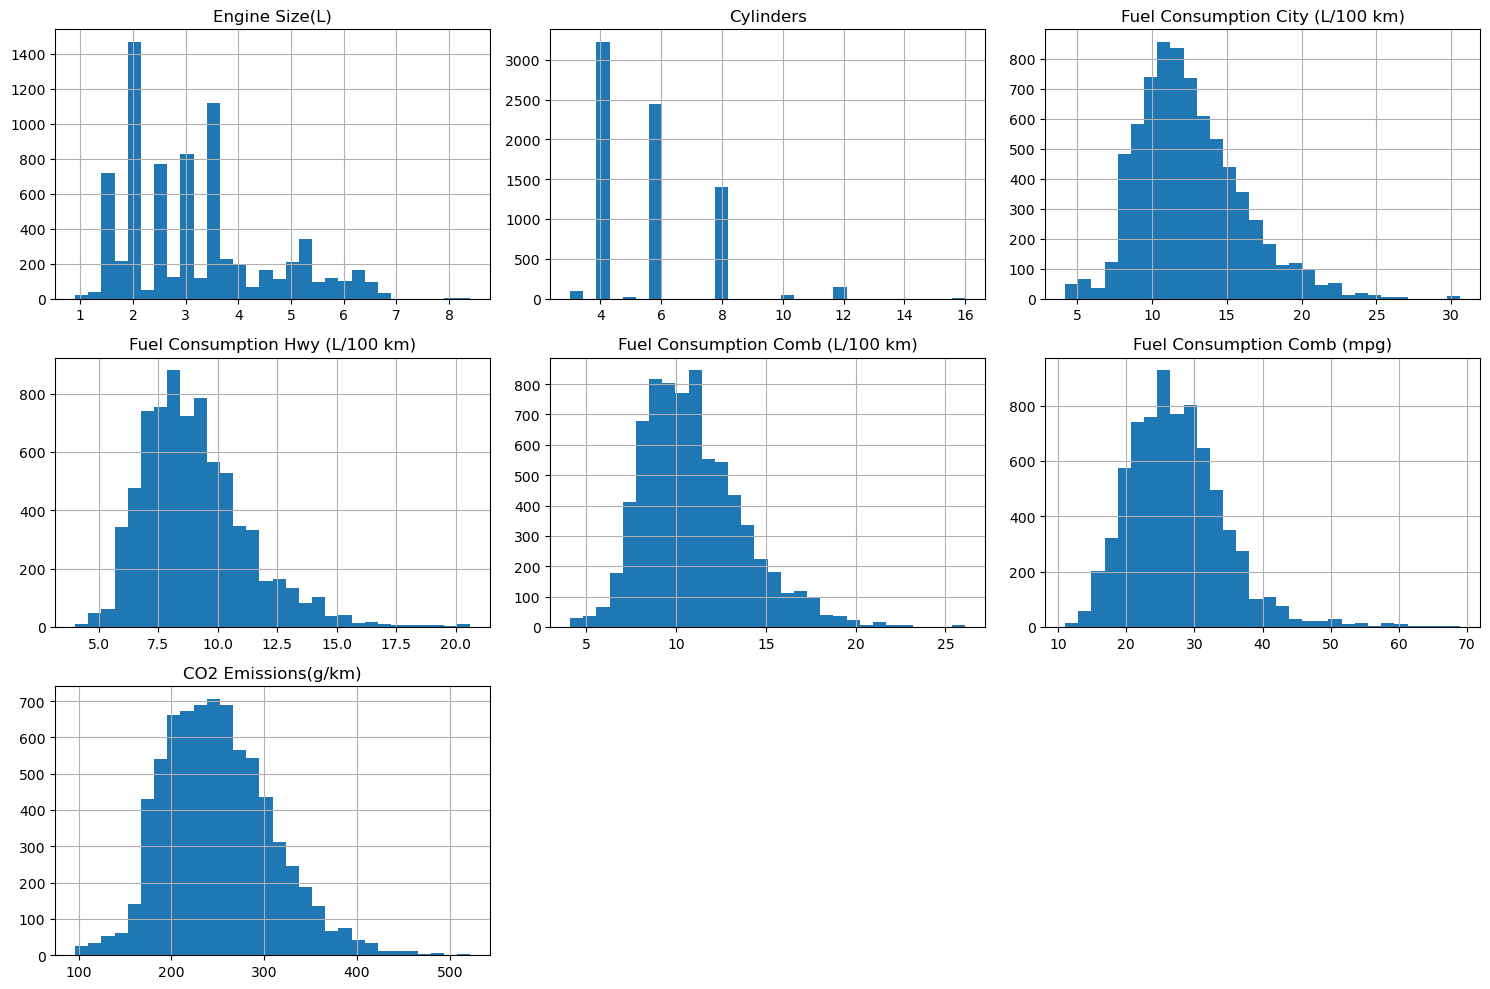

In [30]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

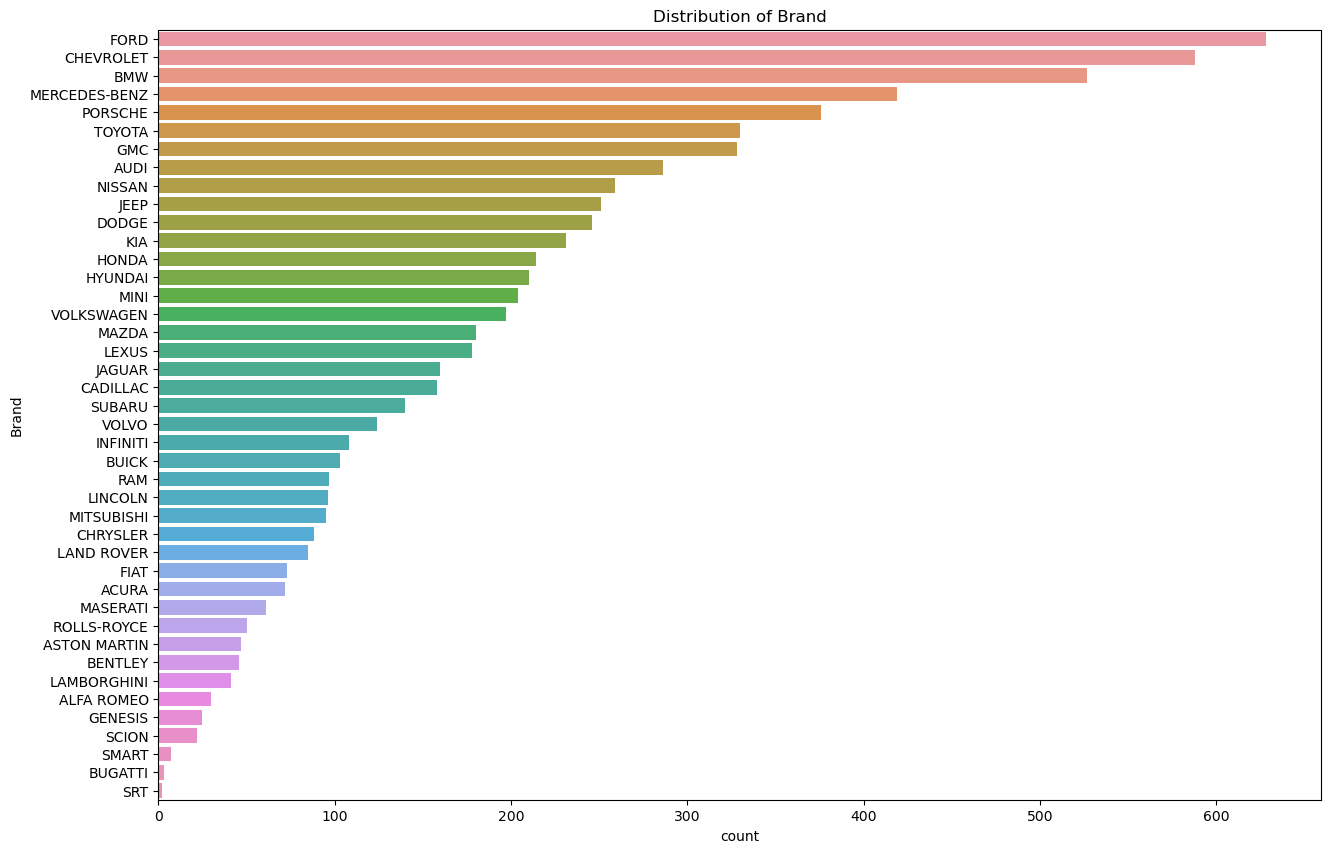

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title('Distribution of Brand')
plt.show()

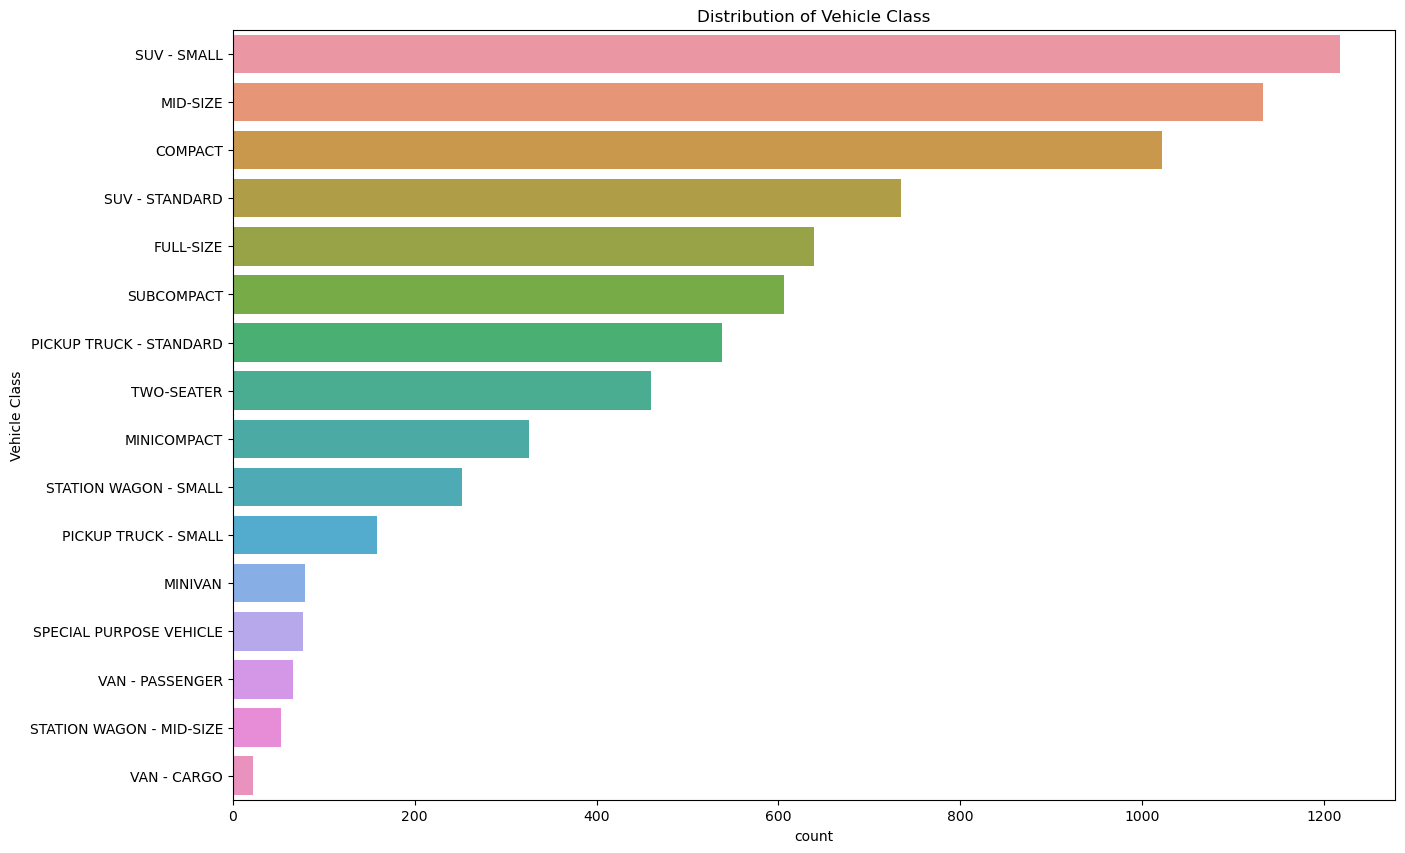

In [32]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Vehicle Class', data=df, order=df['Vehicle Class'].value_counts().index)
plt.title('Distribution of Vehicle Class')
plt.show()

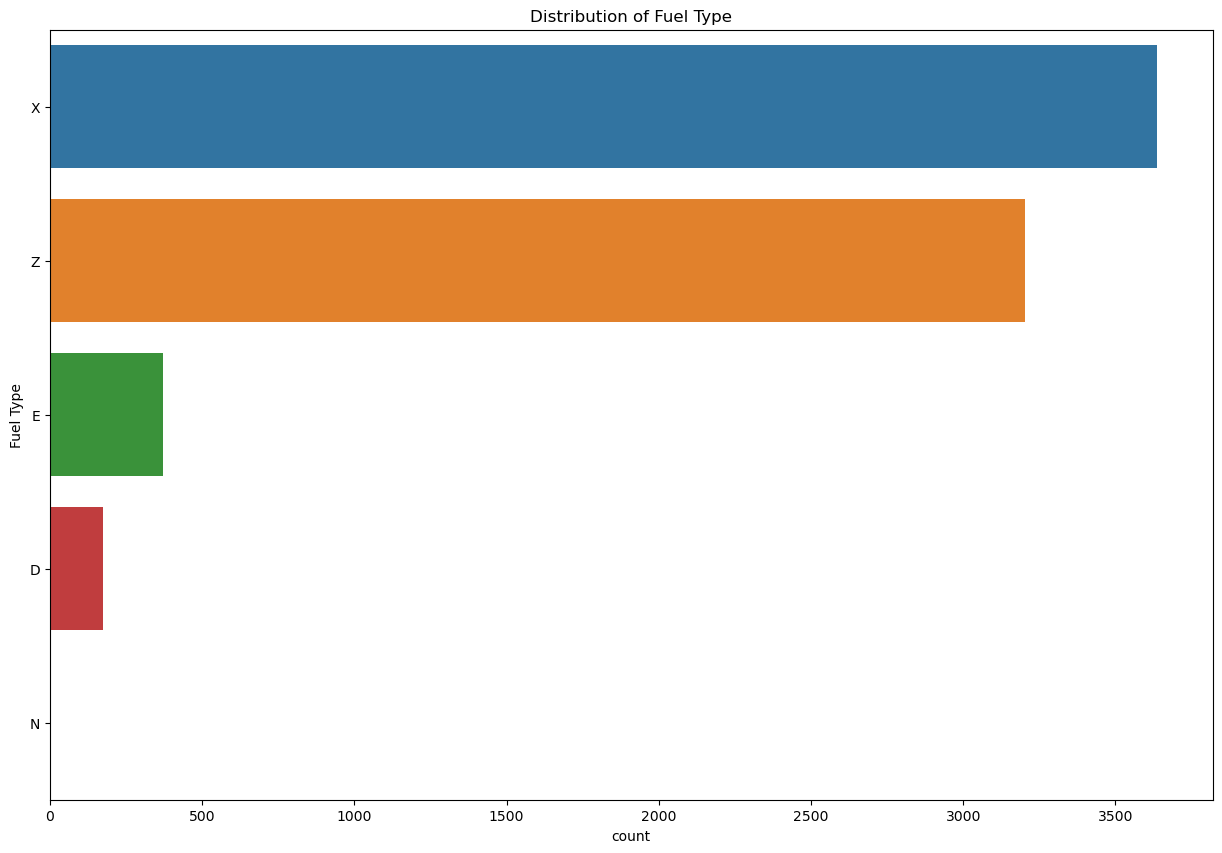

In [33]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Fuel Type', data=df, order=df['Fuel Type'].value_counts().index)
plt.title('Distribution of Fuel Type')
plt.show()

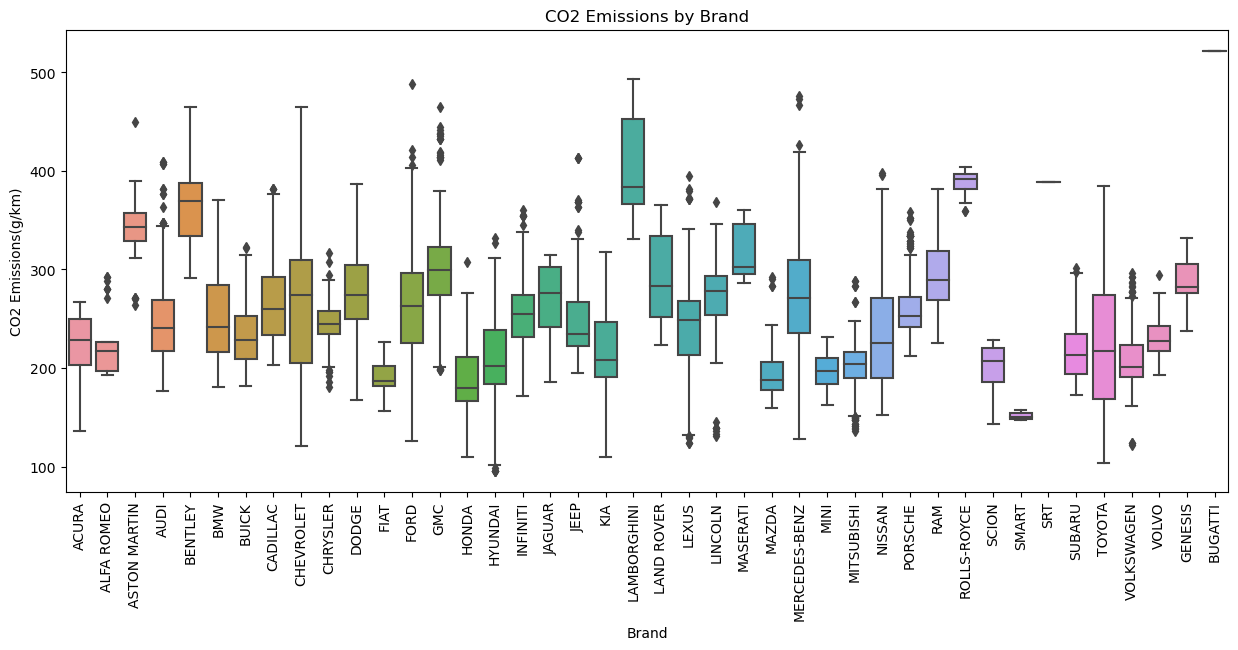

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Brand', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Brand')
plt.show()

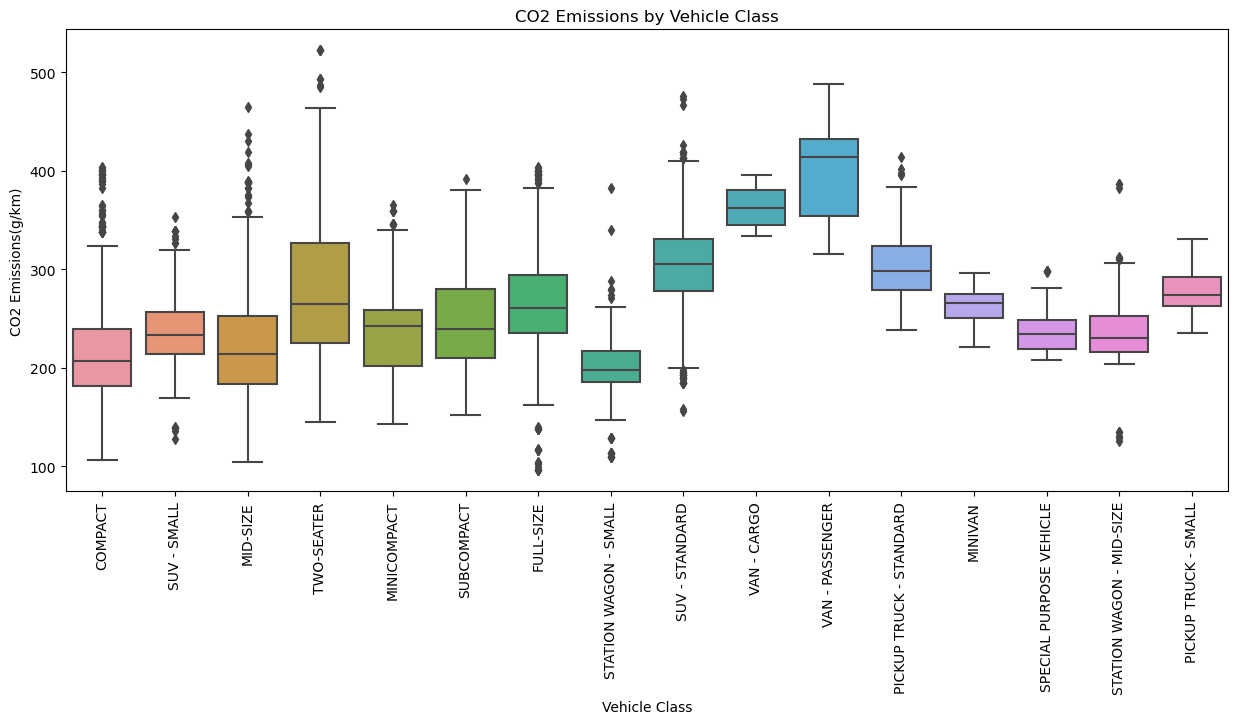

In [35]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Vehicle Class')
plt.show()

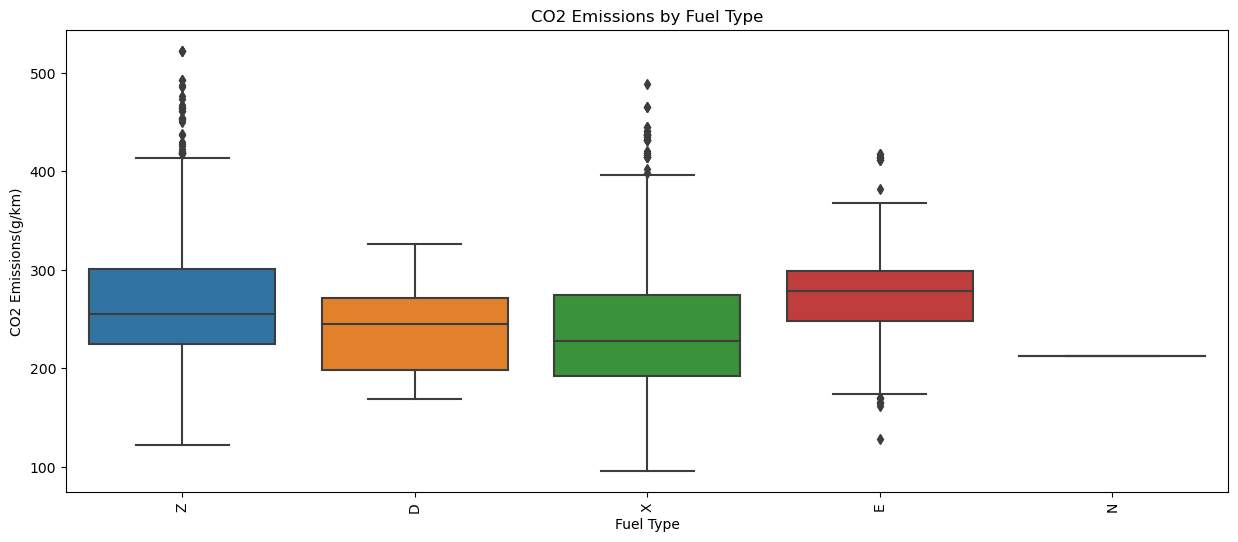

In [36]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Fuel Type')
plt.show()

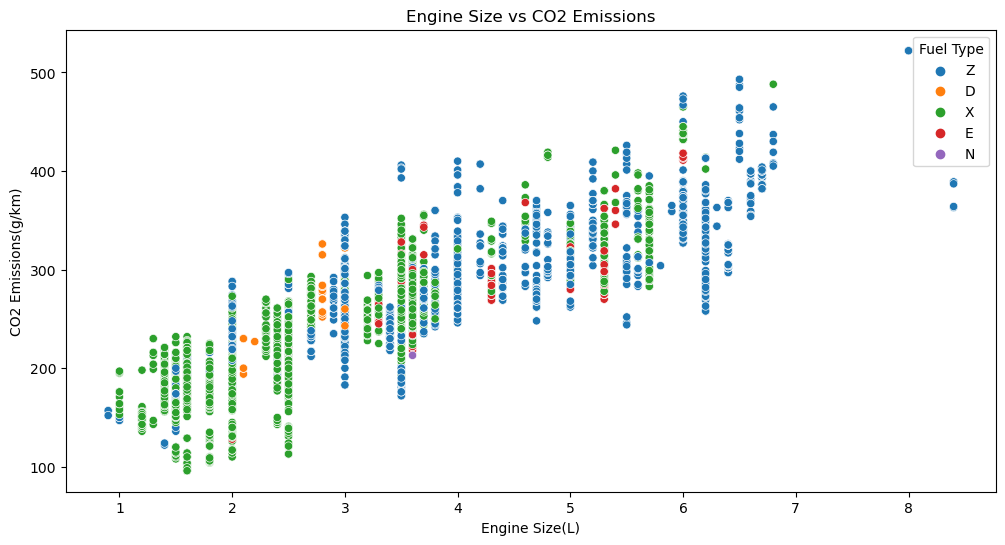

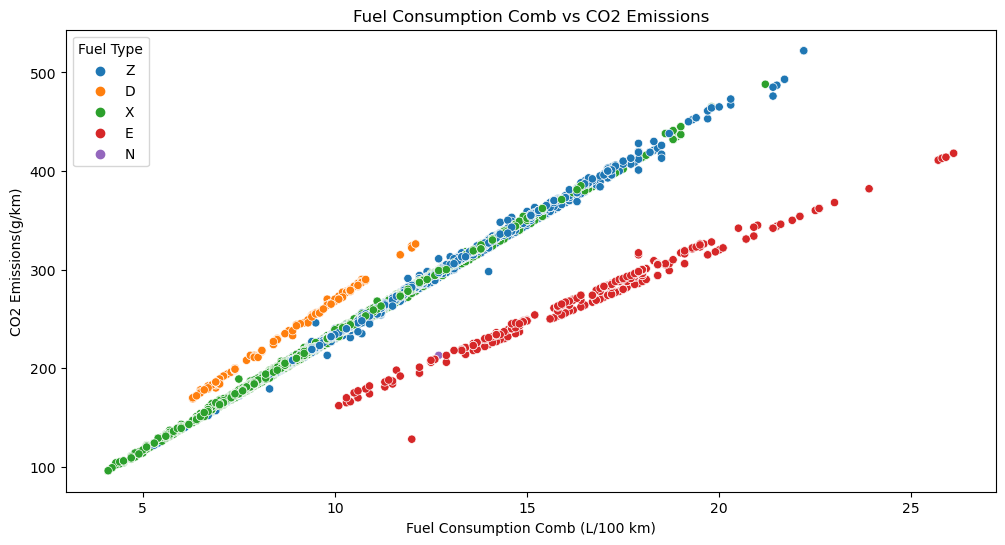

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type', data=df)
plt.title('Engine Size vs CO2 Emissions')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', data=df)
plt.title('Fuel Consumption Comb vs CO2 Emissions')
plt.show()


### Training Regression Model

In [38]:
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                    'Fuel Consumption Comb (mpg)']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_features = ['Brand', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [39]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 29.99
R^2 Score: 0.99
Root Mean Squared Error: 5.48


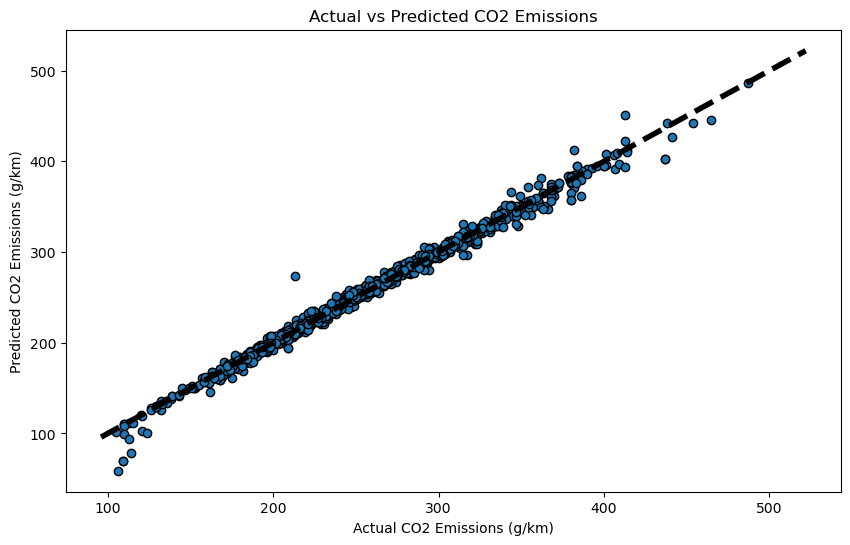

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

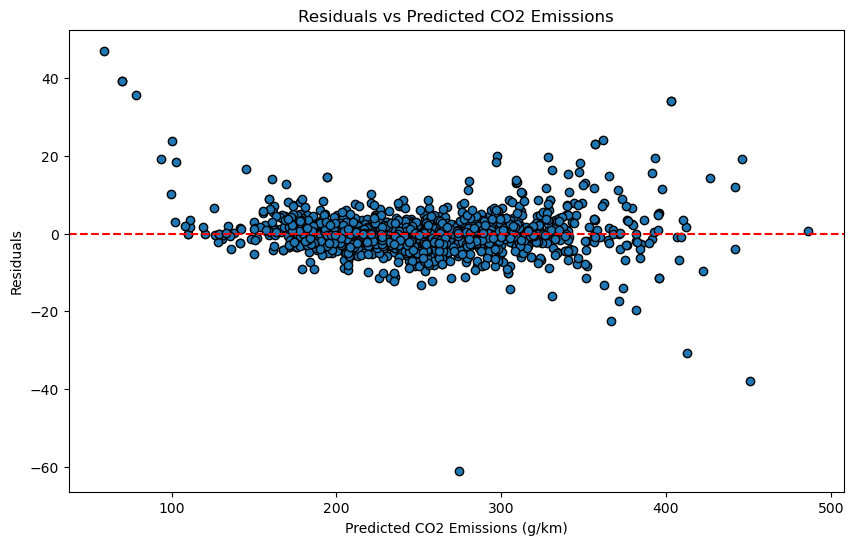

In [41]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted CO2 Emissions')
plt.show()

### Input

In [42]:
# New data
new_data = pd.DataFrame({
    'Brand': ['Toyota'],
    'Model': ['Corolla'],
    'Vehicle Class': ['Compact'],
    'Transmission': ['Automatic'],
    'Fuel Type': ['Gasoline'],
    'Engine Size(L)': [1.8],
    'Cylinders': [4],
    'Fuel Consumption City (L/100 km)': [8.5],
    'Fuel Consumption Hwy (L/100 km)': [6.2],
    'Fuel Consumption Comb (L/100 km)': [7.3],
    'Fuel Consumption Comb (mpg)': [32]
})

# Predict emissions
predictions = model.predict(new_data)
print("Predicted CO2 Emissions (g/km):", predictions)

Predicted CO2 Emissions (g/km): [177.1124451]
